<a href="https://colab.research.google.com/github/Ashish-Tripathy/ComputerVision/blob/master/Assignment_6A_Cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.callbacks import *
from keras.models import load_model

# Loading the Cifar Data

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

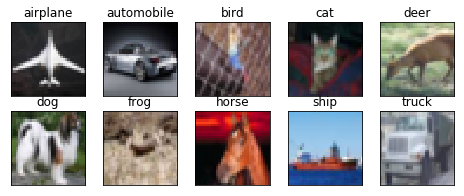

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

# Defining Functions for Model Stats

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

# Data preprocessing

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Baseline Architecture

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # rf = 3x3, ip = 32x32
model.add(Activation('relu')) 
model.add(Convolution2D(48, 3, 3)) # rf = 5X5, ip = 32x32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # rf = 10X10, ip = 30x30 
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same')) # rf = 12x12, ip = 15x15
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3)) # rf = 14x14, ip = 15x15
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #rf = 28x28, ip = 13x13
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same')) #rf = 30x30, ip = 6x6
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3)) #rf = 32x32, ip = 6x6
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #rf = 34x34, ip = 3x3
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_18 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 96)        41568     
__________

## Training the Baseline Architecture

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 9s 24ms/step - loss: 1.8772 - acc: 0.2884 - val_loss: 1.4549 - val_acc: 0.4654
Epoch 2/100
390/390 [==============================] - 9s 22ms/step - loss: 1.3996 - acc: 0.4928 - val_loss: 1.1835 - val_acc: 0.5696
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 1.1789 - acc: 0.5805 - val_loss: 1.0400 - val_acc: 0.6378
Epoch 4/100
390/390 [==============================] - 9s 22ms/step - loss: 1.0397 - acc: 0.6390 - val_loss: 0.9382 - val_acc: 0.6711
Epoch 5/100
390/390 [==============================] - 9s 22ms/step - loss: 0.9282 - acc: 0.6771 - val_loss: 0.9164 - val_acc: 0.6842
Epoch 6/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8423 - acc: 0.7083 - val_loss: 0.8392 - val_acc: 0.7148
Epoch 7/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7828 - acc: 0.7318 - val_loss: 0.7508 - val_acc: 0.7419
Epoch 8/100
390/390 [==============================] - 9s 22ms

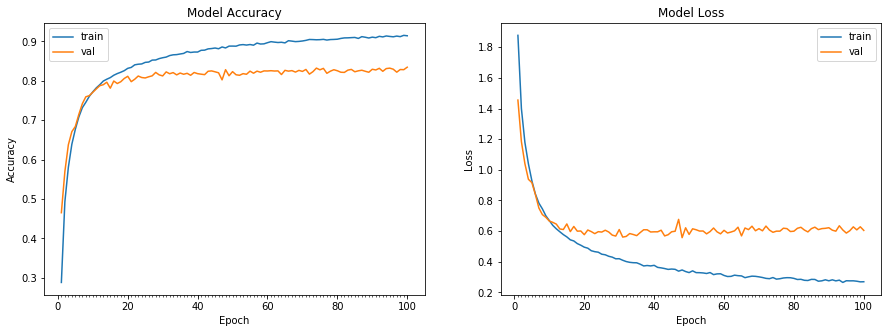

Accuracy on test data is: 83.46


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

<b> Base Accuracy to beat within 100 epochs = 83.46

# Building the Architecture
1. Introduce Batchnormalisation after every convolution
2. Dropout with rate of 0.2
3. Max RF targeted at 26x26 before we apply the large convolution
4. 

In [13]:
from keras.models import Model
from keras.layers import Input,Conv2D, BatchNormalization,Activation, Flatten
from keras.regularizers import l2

input = Input(shape=(32, 32, 3,))

#defining convolution block
def conv_block(inputs, filters,padding = 'valid'):
  conv = Conv2D(filters = filters, kernel_size = (3,3), padding=padding, use_bias=False 
               # , kernel_regularizer = l2(1E-4)
               )(inputs)     
  conv = Dropout(0.2)(conv)
  conv = BatchNormalization()(conv) # BN before ReLu
  conv = Activation('relu')(conv)
  return conv

#defining transition block
def bottleneck(inputs,filters):
  conv = Conv2D(filters = filters, kernel_size = (1,1), padding = 'valid', use_bias = False)(inputs)
  conv = Dropout(0.2)(conv)
  conv = BatchNormalization()(conv)
  conv = Activation('relu')(conv)
  return MaxPooling2D()(conv)

#Building the architecture
First_Layer  =  conv_block(input, 32, padding = 'same')                    #ip = 32, RF = 3x3
Second_Layer =  conv_block(First_Layer,64, padding = 'valid')              #ip = 32, RF = 5x5
Third_Layer  =  conv_block(Second_Layer,128, padding = 'valid')            #ip = 30, RF = 7x7
Fourth_Layer =  conv_block(Third_Layer,256, padding = 'valid')             #ip = 28, RF = 9x9
Transition_1 =  bottleneck(Fourth_Layer,64)                                #ip = 26, RF = 18x18
Fifth_Layer  =  conv_block(Transition_1,64, padding = 'same')             #ip = 13, RF = 20x20
Sixth_Layer  =  conv_block(Fifth_Layer,128, padding = 'valid')             #ip = 13, RF = 22x22 
Seventh_Layer=  conv_block(Sixth_Layer,256, padding = 'valid')             #ip = 11, RF = 24x24
Eigth_Layer  =  conv_block(Seventh_Layer,512, padding = 'valid')          #ip = 9, RF = 26x26


last1x1      =  Conv2D(filters = 10, kernel_size = (1,1), padding = 'valid', use_bias = False)(Eigth_Layer)
last1x1      =  Activation('relu')(last1x1)
last_layer   =  Conv2D(filters = 10, kernel_size = (7,7), padding = 'valid', use_bias = False)(last1x1) 
flatten      =  Flatten()(last_layer)
output       =  Activation('softmax')(flatten)

#creating the model
model = Model(inputs=[input], outputs=[output])
#model = Model(inputs=[input], outputs=[last1x1])
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 32)        864       
_________________________________________________________________
dropout_37 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_41 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 30, 30, 64)        18432     
_________________________________________________________________
dropout_38 (Dropout)         (None, 30, 30, 64)        0         
__________

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Training the Model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 49s 125ms/step - loss: 1.5707 - acc: 0.4433 - val_loss: 2.2510 - val_acc: 0.3394

Epoch 00001: val_acc improved from -inf to 0.33940, saving model to /content/gdrive/My Drive/Colab Notebooks/Asg6Cifar_4thJune:001-val_acc:0.339.hdf5
Epoch 2/100
390/390 [==============================] - 47s 119ms/step - loss: 1.1070 - acc: 0.6293 - val_loss: 1.5432 - val_acc: 0.5306

Epoch 00002: val_acc improved from 0.33940 to 0.53060, saving model to /content/gdrive/My Drive/Colab Notebooks/Asg6Cifar_4thJune:002-val_acc:0.531.hdf5
Epoch 3/100
390/390 [==============================] - 46s 118ms/step - loss: 0.8814 - acc: 0.7083 - val_loss: 1.2033 - val_acc: 0.6007

Epoch 00003: val_acc improved from 0.53060 to 0.60070, saving model to /content/gdrive/My Drive/Colab Notebooks/Asg6Cifar_4thJune:003-val_acc:0.601.hdf5
Epoch 4/100
390/390 [==============================] - 46s 118ms/step - loss: 0.7576 - acc: 0.7522 - val_loss: 0.7887 - val_acc: 0.73

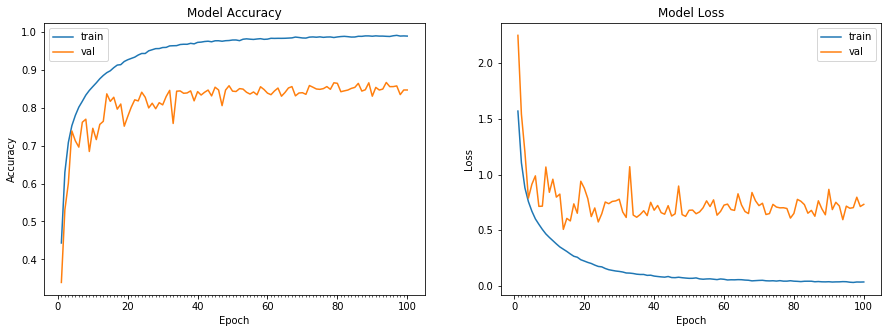

Accuracy on test data is: 84.64


In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)




filepath="/content/gdrive/My Drive/Colab Notebooks/Asg6Cifar_4thJune:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,save_weights_only=False, mode='auto')

callback_list = [checkpoint]

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks = callback_list )


end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


#### Better accuracy of 83.62 was achieved by 14th epoch.

# Best Accuracy
#### Best Accuracy of 86.62 was achieved at 94th Epocch

In [20]:

# compute test accuracy\
modelPath = '/content/gdrive/My Drive/Colab Notebooks/Asg6Cifar_4thJune:094-val_acc:0.866.hdf5'
model = load_model(modelPath)
print ("Accuracy on test data from best trained model is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data from best trained model is: 86.62
